<a href="https://colab.research.google.com/github/sai14karthik/Soft-Computing-/blob/main/AP21110010310_SC_LAB10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sai Karthik AP21110010310 CSE-E




Write a python program to realize a fuzzy rule of any popular problem (s).




In [5]:
pip install -U scikit-fuzzy


Suggested tip: 14.72


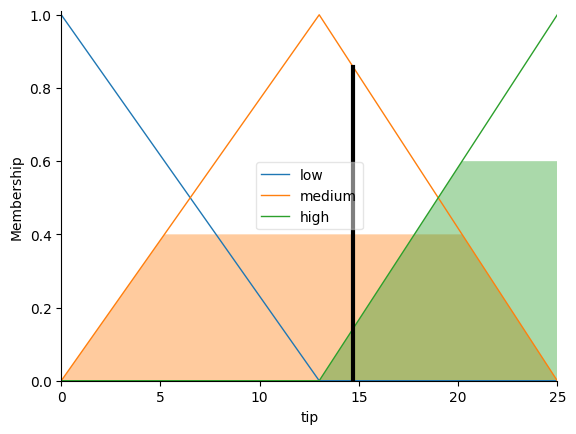

In [6]:
import numpy as np
import skfuzzy as fuzz
import skfuzzy.control as ctrl

service = ctrl.Antecedent(np.arange(0, 11, 1), 'service')
food = ctrl.Antecedent(np.arange(0, 11, 1), 'food')
tip = ctrl.Consequent(np.arange(0, 26, 1), 'tip')

service['poor'] = fuzz.trimf(service.universe, [0, 0, 5])
service['average'] = fuzz.trimf(service.universe, [0, 5, 10])
service['good'] = fuzz.trimf(service.universe, [5, 10, 10])

food['bad'] = fuzz.trimf(food.universe, [0, 0, 5])
food['decent'] = fuzz.trimf(food.universe, [0, 5, 10])
food['delicious'] = fuzz.trimf(food.universe, [5, 10, 10])

tip['low'] = fuzz.trimf(tip.universe, [0, 0, 13])
tip['medium'] = fuzz.trimf(tip.universe, [0, 13, 25])
tip['high'] = fuzz.trimf(tip.universe, [13, 25, 25])

rule1 = ctrl.Rule(service['poor'] | food['bad'], tip['low'])
rule2 = ctrl.Rule(service['average'] & food['decent'], tip['medium'])
rule3 = ctrl.Rule(service['good'] | food['delicious'], tip['high'])

tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)

tipping.input['service'] = 7
tipping.input['food'] = 8

tipping.compute()

print(f"Suggested tip: {tipping.output['tip']:.2f}")

tip.view(sim=tipping)